In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230112-221136.941 54514 INFO root:20 local study files stored in: /Users/sgpeo/projects/cellenium/cellenium/scratch


In [2]:
url = "https://covid19.cog.sanger.ac.uk/vieira19_Alveoli_and_parenchyma_anonymised.processed.h5ad"
adata = prep.get_h5ad_from_url(url, "lung_asthma")

In [3]:
prep.jupyter_h5ad_overview(adata)

,Sample,Donor,Source,Location,CellType,BroadCellType
index,,,,,,
LungTranscriptome7239220_LungTranscriptome7239220ACGGAGATCAAGGTAA-0,LungTranscriptome7239220_LungTranscriptome7239220,298C,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated
LungTranscriptome7135919_GGCGTGTCATACCATG-0,LungTranscriptome7135919,290B,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated
LungTranscriptome7135920_GCGACCATCAGTTAGC-0,LungTranscriptome7135920,290B,Transplant,Alveoli and parenchyma,Basal 2,Basal
LungTranscriptome7239219_LungTranscriptome7239219CATTCGCAGCCGCCTA-0,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated
LungTranscriptome7135920_TCAACGAGTATCTGCA-0,LungTranscriptome7135920,290B,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated
...,...,...,...,...,...,...
LungTranscriptome7239219_LungTranscriptome7239219GGGCATCCACCAACCG-1,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Mast cells,Mast cells
LungTranscriptome7239219_LungTranscriptome7239219TGCTGCTAGCAATCTC-1,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Mast cells,Mast cells
LungTranscriptome7239213_GACTGCGTCCTGCCAT-1,LungTranscriptome7239213,292B,Transplant,Alveoli and parenchyma,Mast cells,Mast cells


,highly_variable,means,dispersions,dispersions_norm
index,,,,
RP11-34P13.3,False,1.000000e-12,NaN,NaN
FAM138A,False,1.000000e-12,NaN,NaN
OR4F5,False,1.000000e-12,NaN,NaN
RP11-34P13.7,False,4.336628e-03,1.440831,0.521987
RP11-34P13.8,False,1.000000e-12,NaN,NaN
...,...,...,...,...
AC233755.2,False,1.913299e-04,0.909056,-1.162769
AC233755.1,False,1.261966e-03,1.266680,-0.029754
AC240274.1,False,7.457980e-02,1.375593,0.315302


(12971, 33694)

<12971x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 29602881 stored elements in Compressed Sparse Column format>

OverloadedDict, wrapping:
	{'leiden': {'params': {'n_iterations': array([-1]), 'random_state': array([0]), 'resolution': array([0.9])}}, 'neighbors_hm': {'connectivities': <12971x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 284008 stored elements in Compressed Sparse Row format>, 'distances': <12971x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 181594 stored elements in Compressed Sparse Row format>, 'params': {'method': array(['umap'], dtype=object), 'metric': array(['euclidean'], dtype=object), 'n_neighbors': array([15]), 'n_pcs': array([20]), 'use_rep': array(['X_pca_hm'], dtype=object)}}, 'pca': {'variance': array([135.92006  ,  82.47617  ,  68.41536  ,  46.644993 ,  41.85882  ,
        36.17705  ,  19.508629 ,  18.91429  ,  15.873847 ,  14.352386 ,
        13.760944 ,  11.110788 ,   9.802099 ,   8.827964 ,   8.145107 ,
         7.59562  ,   6.9778137,   6.7990026,   6.191219 ,   5.7125483,
         5.5117917,   5.374306 ,   5.1293483,   4.8821034,   4.

/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['connectivities'] that happens to be dimensioned at n_obs×n_obs (12971×12971).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['distances'] that happens to be dimensioned at n_obs×n_obs (12971×12971).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
20230112-221201.611 54514 INFO root:123 make_norm_expression: no transformations necessary
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please

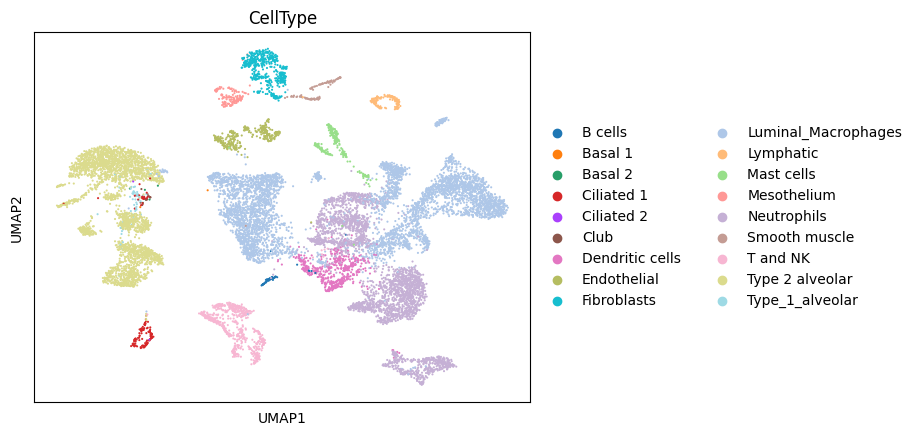

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
prep.density_sample_umap(adata)
sc.pl.umap(adata, color='CellType')

In [5]:
prep.calculate_differentially_expressed_genes(adata, ['CellType','BroadCellType'])

diff.exp. genes: 100%|█████████████████████████████████████████████████████████████████████| 2/2 [01:18<00:00, 39.07s/it]
20230112-221539.507 54514 INFO root:292 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['CellType', 'BroadCellType']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,CSTB,77.817535,1.412415,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
1,CTSD,76.475533,1.784404,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
2,GPNMB,76.200821,3.385508,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
3,APOC1,73.483475,2.969045,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
4,ACP5,71.897850,2.952302,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
...,...,...,...,...,...,...,...,...
3224,BAZ1A,2.316792,1.691065,0.020515,0.999121,Basal,_OTHERS_,BroadCellType
3225,CDK9,2.311717,2.722002,0.020793,0.999121,Basal,_OTHERS_,BroadCellType
3226,LDHB,2.307086,0.869298,0.021050,0.999121,Basal,_OTHERS_,BroadCellType
3227,KRT5,2.306997,11.309298,0.021055,0.999121,Basal,_OTHERS_,BroadCellType


In [6]:
prep.set_cellenium_metadata(
    adata,
    title='A cellular census of human lungs identifies novel cell states in health and in asthma',
    description='Here, we use single-cell transcriptomics to chart the cellular landscape of upper and lower airways and lung parenchyma in healthy lungs, and lower airways in asthmatic lungs.',
    taxonomy_id=9606,
    ncit_tissue_ids=['C12468', 'C33839'],
    mesh_disease_ids=['D001249'],
    X_pseudolayer_name='norm_log_expression',
    main_sample_attributes=['CellType','BroadCellType']
)   

In [7]:
prep.cello_classify_celltypes(adata, 'CellType')

Found CellO resources at '/Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources'.
Checking if any pre-trained model is compatible with this input dataset...


/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Could not find compatible pre-trained model.
Found CellO resources at '/Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources'.
Loading ontology...
Loading expression data from /Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources/training_set/log_tpm.h5...
Loaded matrix of shape (4293, 58243)
done.
Inferred that input file uses HGNC gene symbols.
Of 22212 genes in the input file, 16951 were found in the training set of 58243 genes.
Training model...
Fitting PCA with 3000 components...
done.
Transforming with PCA...
done.
(1/317)
Training classifier for label CL:0000576...
Number of positive items: 314
Number of negative items: 3950
(2/317)
Training classifier for label CL:0002087...
Number of positive items: 2010
Number of negative items: 2267
(3/317)
Training classifier for label CL:2000001...
Number of positive items: 1575
Number of negative items: 2242
(4/317)
Training classifier for label CL:0000842...
Number of positive items: 2010
Numbe

/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['connectivities'] that happens to be dimensioned at n_obs×n_obs (12971×12971).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['distances'] that happens to be dimensioned at n_obs×n_obs (12971×12971).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/cello/cello.py:477: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be a

Transforming with PCA...
done.
Making predictions for each classifier...
Running solver on item 1/18...
Running solver on item 2/18...
Running solver on item 3/18...
Running solver on item 4/18...
Running solver on item 5/18...
Running solver on item 6/18...
Running solver on item 7/18...
Running solver on item 8/18...
Running solver on item 9/18...
Running solver on item 10/18...
Running solver on item 11/18...
Running solver on item 12/18...
Running solver on item 13/18...
Running solver on item 14/18...
Running solver on item 15/18...
Running solver on item 16/18...
Running solver on item 17/18...
Running solver on item 18/18...
Checking if any pre-trained model is compatible with this input dataset...


/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Of 22212 genes in the input file, 16951 were found in the training set of 58243 genes.
Of 22212 genes in the input file, 16520 were found in the training set of 31283 genes.
Using thresholds stored in /Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources/trained_models/ir.10x_genes_thresholds.tsv
Binarizing classifications...
Mapping each sample to its predicted labels...
Computing the most-specific predicted labels...
Loading ontology...
Item B cells predicted to be "memory B cell (CL:0000787)"
Item Basal 1 predicted to be "epithelial cell (CL:0000066)"
Item Basal 2 predicted to be "type II pneumocyte (CL:0002063)"
Item Ciliated 1 predicted to be "epithelial cell of upper respiratory tract (CL:0002631)"
Item Ciliated 2 predicted to be "epithelial cell of lung (CL:0000082)"
Item Club predicted to be "epithelial cell of upper respiratory tract (CL:0002631)"
Item Dendritic cells predicted to be "CD1c-positive myeloid dendritic cell (CL:0002399)"
Item Endothelial pre

# final h5ad file

In [8]:
adata.write(prep.basedir.joinpath("lung_asthma.h5ad"))
prep.jupyter_h5ad_overview(adata)

... storing 'CellO_celltype' as categorical


,Sample,Donor,Source,Location,CellType,BroadCellType,n_genes,CellO_celltype
index,,,,,,,,
LungTranscriptome7239220_LungTranscriptome7239220ACGGAGATCAAGGTAA-0,LungTranscriptome7239220_LungTranscriptome7239220,298C,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,3591,epithelial cell of upper respiratory tract
LungTranscriptome7135919_GGCGTGTCATACCATG-0,LungTranscriptome7135919,290B,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2421,epithelial cell of upper respiratory tract
LungTranscriptome7135920_GCGACCATCAGTTAGC-0,LungTranscriptome7135920,290B,Transplant,Alveoli and parenchyma,Basal 2,Basal,1575,type II pneumocyte
LungTranscriptome7239219_LungTranscriptome7239219CATTCGCAGCCGCCTA-0,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2223,epithelial cell of upper respiratory tract
LungTranscriptome7135920_TCAACGAGTATCTGCA-0,LungTranscriptome7135920,290B,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2037,epithelial cell of upper respiratory tract
...,...,...,...,...,...,...,...,...
LungTranscriptome7239219_LungTranscriptome7239219GGGCATCCACCAACCG-1,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,1178,hematopoietic cell
LungTranscriptome7239219_LungTranscriptome7239219TGCTGCTAGCAATCTC-1,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,1919,hematopoietic cell
LungTranscriptome7239213_GACTGCGTCCTGCCAT-1,LungTranscriptome7239213,292B,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,4401,hematopoietic cell


,highly_variable,means,dispersions,dispersions_norm,n_cells
index,,,,,
RP11-34P13.7,False,0.004337,1.440831,0.512841,18
FO538757.2,False,0.473574,1.297462,0.357271,2357
AP006222.2,False,0.343604,1.146231,-0.708055,1841
RP4-669L17.10,False,0.011301,1.482129,0.685565,41
RP5-857K21.4,False,0.001891,1.522884,0.856022,7
...,...,...,...,...,...
AC007325.2,False,0.030610,1.099211,-0.915957,161
AL354822.1,False,0.010744,1.234672,-0.349402,50
AC004556.1,True,0.039421,1.465879,0.617602,146


(12971, 22312)

<12971x22312 sparse matrix of type '<class 'numpy.float32'>'
	with 29598864 stored elements in Compressed Sparse Column format>

OverloadedDict, wrapping:
	{'leiden': {'params': {'n_iterations': array([-1]), 'random_state': array([0]), 'resolution': array([0.9])}}, 'neighbors_hm': {'connectivities': <12971x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 284008 stored elements in Compressed Sparse Row format>, 'distances': <12971x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 181594 stored elements in Compressed Sparse Row format>, 'params': {'method': array(['umap'], dtype=object), 'metric': array(['euclidean'], dtype=object), 'n_neighbors': array([15]), 'n_pcs': array([20]), 'use_rep': array(['X_pca_hm'], dtype=object)}}, 'pca': {'variance': array([135.92006  ,  82.47617  ,  68.41536  ,  46.644993 ,  41.85882  ,
        36.17705  ,  19.508629 ,  18.91429  ,  15.873847 ,  14.352386 ,
        13.760944 ,  11.110788 ,   9.802099 ,   8.827964 ,   8.145107 ,
         7.59562  ,   6.9778137,   6.7990026,   6.191219 ,   5.7125483,
         5.5117917,   5.374306 ,   5.1293483,   4.8821034,   4.